## 0. Setup

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [28]:
cd ~/CRG/scripts

/Users/tiavlovskiegor/CRG/scripts


## 1. Forming full feature data set

## 2. Preparing inputs for Machine Learning

In [30]:
%run ML_inputs.py
ML_inputs = get_ML_inputs()



1. Encoding categorical features

	There are (5,) unique values for "cat" feature.
	['AG' 'AP' 'EN' 'IN' 'SG']

	There are (2,) unique values for "strand" feature.
	['+' '-']

	There are (5,) unique values for "cat" feature.
	['AG' 'AP' 'EN' 'IN' 'SG']

	There are (2,) unique values for "strand" feature.
	['+' '-']


2. Identifying features present in the dataset

	69 features of type 'distance' are present

	1 features of type 'row_sum' are present

	58 features of type 'chip_c_hb_r' are present

	1 features of type 'intra_inter_ratio' are present

	58 features of type 'chip_c_zb_r' are present

	58 features of type 'chip_c_hb' are present
		Excluding feature type: 'chip_c_hb'

	1 features of type 'ab_score' are present

	58 features of type 'chip_c_zb' are present
		Excluding feature type: 'chip_c_zb'

	7 features of type 'one_hot' are present

	1 features of type 'contact_decay' are present

	1 features of type 'gmfpt' are present

	List of excluded individual features:
	['DNA', '

## Running Machine Learning

In [31]:
%run ML_pipelines.py

### Testing my pipline

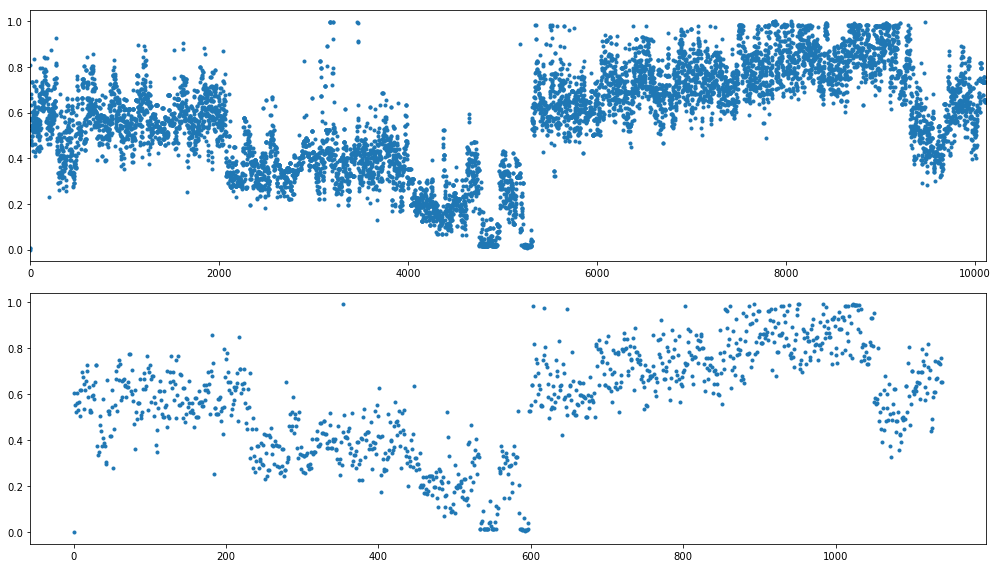

In [181]:
feature = "gmfpt"
array = ML_inputs["train_samples"][:,ML_inputs["feature_types"][feature]].ravel().astype(float)
array = array[np.isfinite(array)]
%run myplot
f,ax = myplot(array,shape=(2,1),style=".")
array = ML_inputs["test_samples"][:,ML_inputs["feature_types"][feature]].ravel().astype(float)
array = array[np.isfinite(array)]
ax[1].plot(array,".")

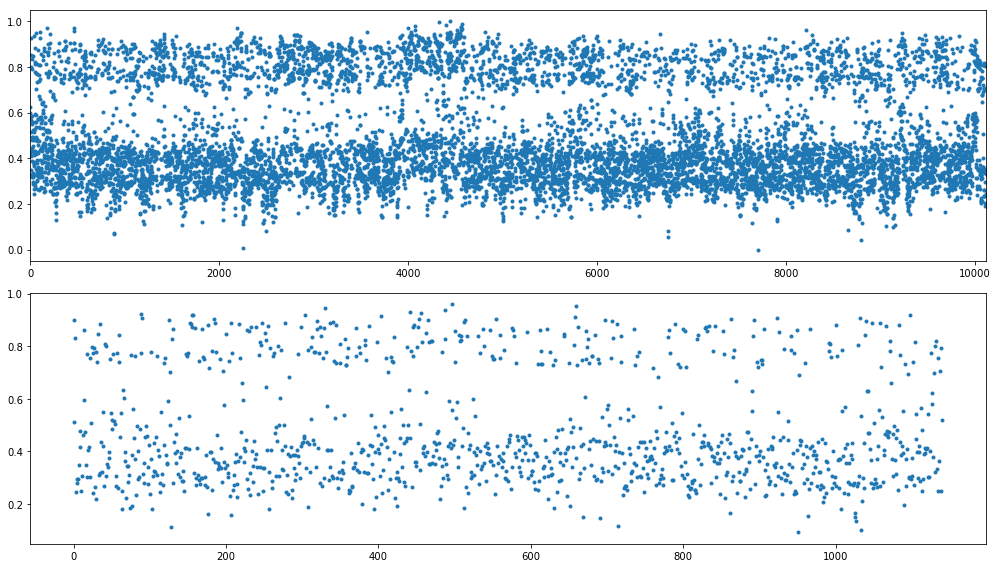

In [164]:
targets = ML_inputs["train_targets"].ravel().astype(float)
targets = targets[np.isfinite(targets)]
%run myplot
f,ax = myplot(targets,shape=(2,1),style=".")
targets = ML_inputs["test_targets"].ravel().astype(float)
targets = targets[np.isfinite(targets)]
ax[1].plot(targets,".")

In [187]:
ML_inputs.data.feature_names[ML_inputs.data.mask.features_mask]

array(['ab_score', 'intra_inter_ratio', 'row_sum', 'gmfpt', 'c_decay',
       'cat_oh__AG', 'cat_oh__AP', 'cat_oh__EN', 'cat_oh__IN',
       'strand_oh__-'], 
      dtype='|S22')

In [188]:
min_value = ML_inputs.data.preprocessing["targets"].min_value
max_value = ML_inputs.data.preprocessing["targets"].max_value

In [189]:
print ML_inputs.data.preprocessing["targets"].fields
print ML_inputs.data.preprocessing["targets"].weights

{}
[ 0.80420378 -0.21944134  0.47554252 -0.22908507  0.55997798 -0.63320333
  0.6462903  -0.84156985 -0.23720268  0.46825053]


In [191]:
print clf.best_estimator_.coef_*(max_value-min_value)

[ 0.81468222 -0.21683588  0.47200606 -0.2202652   0.55644136 -0.63428358
  0.65656113 -0.84386213 -0.23378928  0.47051041]


In [159]:
X,y = ML_inputs.get_data("train")
array = np.sum(X * ML_inputs.data.preprocessing["targets"].weights,axis = 1)
(array-np.min(array))/(np.max(array)-np.min(array))

array([ 0.44495092,  0.4497785 ,  0.53001784, ...,  0.62099503,
        0.47841267,  0.61757489])

In [173]:
clf.best_estimator_.intercept_*(max_value-min_value)+min_value

array([ 0.])

In [141]:
y

array([ 0.44495092,  0.4497785 ,  0.53001784, ...,  0.62099503,
        0.47841267,  0.61757489])

In [147]:
np.sum(X * clf.best_estimator_.coef_,axis = 1)+clf.best_estimator_.intercept_

array([ 0.44106359,  0.44554175,  0.52750619, ...,  0.62176457,
        0.47958616,  0.61861188])

### Regression


Running ML with Linear_R...

		Time taken:0.66

		CV 'train' score (mean +/- 2*sd): 0.93 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): 0.93 (+/- 0.00)

Train score is 0.93

Test score is 1.00


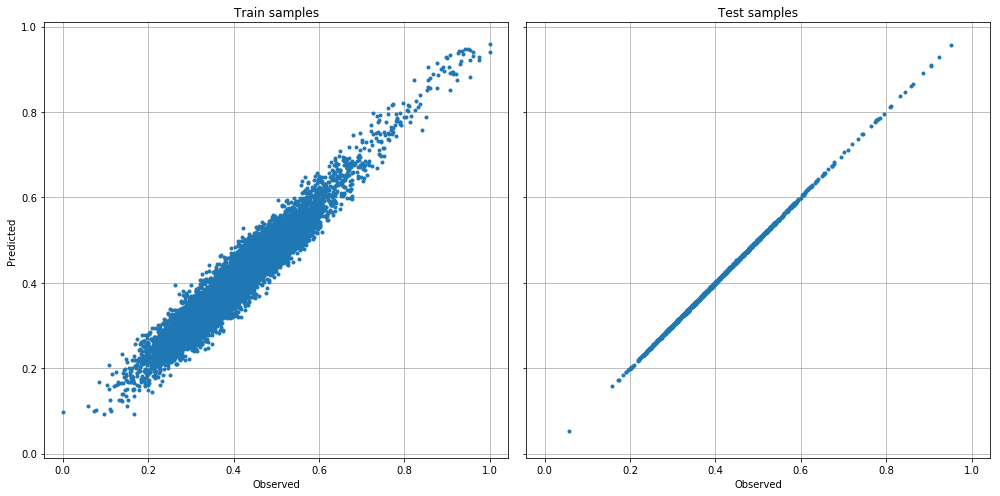

In [190]:
%run ML_pipelines.py
estimator = "Linear_R"
clf = run_ML(ML_inputs,estimator,fit_intercept = True)


Running ML with Lasso_R...

	Performing parameter grid search...

		Time taken:0.74

		Best parameters: {'alpha': 0.0001}

		CV 'train' score (mean +/- 2*sd): 0.93 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): 0.93 (+/- 0.01)

Train score is 0.93

Test score is 1.00


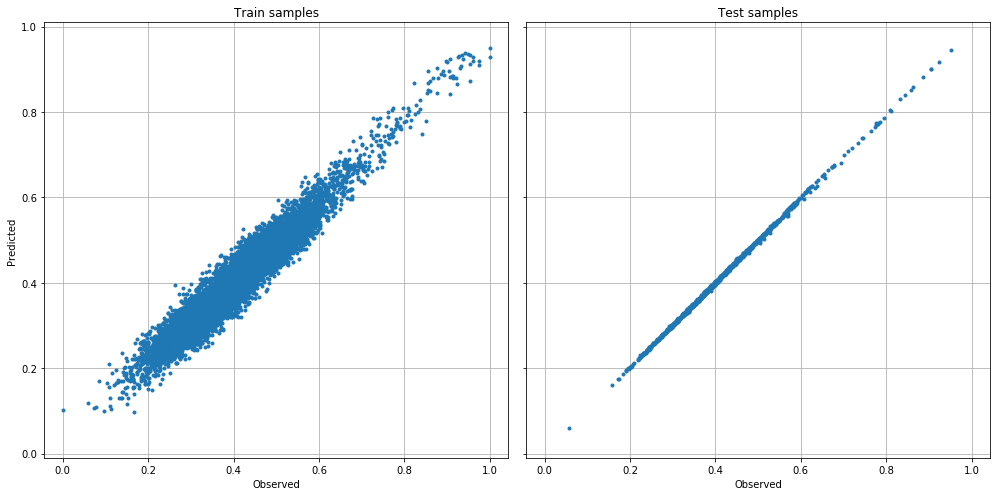

In [192]:
%run ML_pipelines.py
estimator = "Lasso_R"
clf = run_ML(ML_inputs,estimator,parameters = {"alpha":(1e-4,)})


Running ML with RF_R...

	Performing parameter grid search...

		Time taken:8.99

		Best parameters: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}

		CV 'train' score (mean +/- 2*sd): 1.00 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): 0.99 (+/- 0.00)

Train score is 1.00

Test score is 1.00


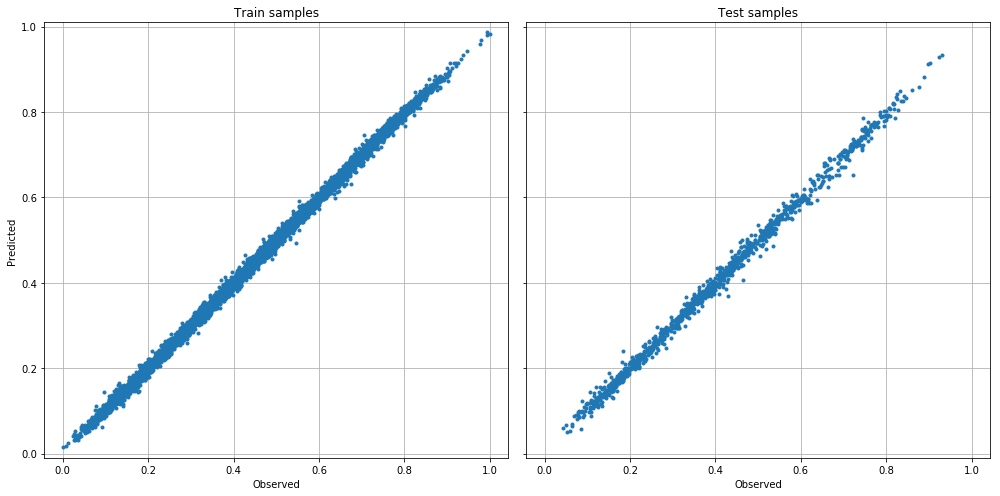

In [184]:
%run ML_pipelines.py
estimator = "RF_R"
clf = run_ML(ML_inputs,estimator)

DecisionTreeRegressor

	Running ML with DTree_R ...

	Performing parameter grid search...

		Time taken:10.43

		Best parameters: {'max_features': 'auto', 'min_samples_split': 100}

		CV 'train' score (mean +/- 2*sd): 0.93 (+/- 0.03)

		CV 'test' score (mean +/- 2*sd): 0.70 (+/- 0.24)

	Train score is 0.94

	Test score is 0.92


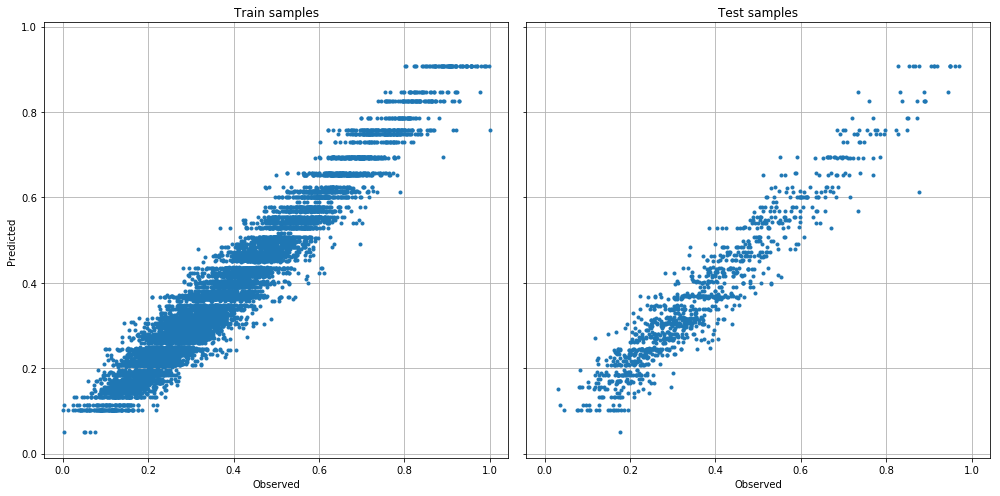

In [37]:
%run ML_pipelines.py
estimator_name = "DTree_R"
clf = run_ML(ML_inputs,estimator_name)


Running ML with kNN_R...

	Performing parameter grid search...

		Time taken:3.86

		Best parameters: {'n_neighbors': 5, 'weights': 'distance'}

		CV 'train' score (mean +/- 2*sd): 1.00 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): 0.99 (+/- 0.01)

Train score is 1.00

Test score is 0.99


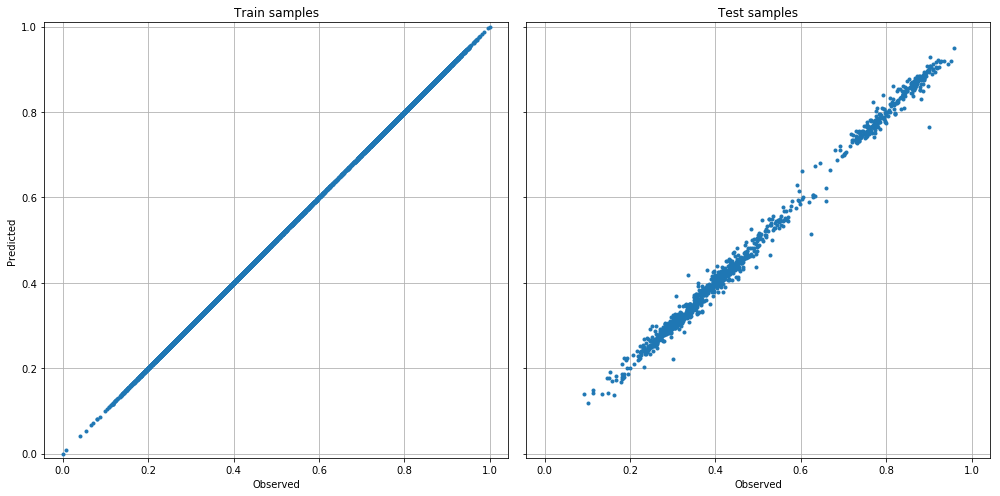

In [177]:
estimator = "kNN_R"
clf = run_ML(ML_inputs,estimator)


Running ML with GB_R...

	Performing parameter grid search...

		Time taken:22.09

		Best parameters: {'n_estimators': 500, 'loss': 'ls', 'max_depth': 3}

		CV 'train' score (mean +/- 2*sd): 1.00 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): 1.00 (+/- 0.00)

Train score is 1.00

Test score is 1.00


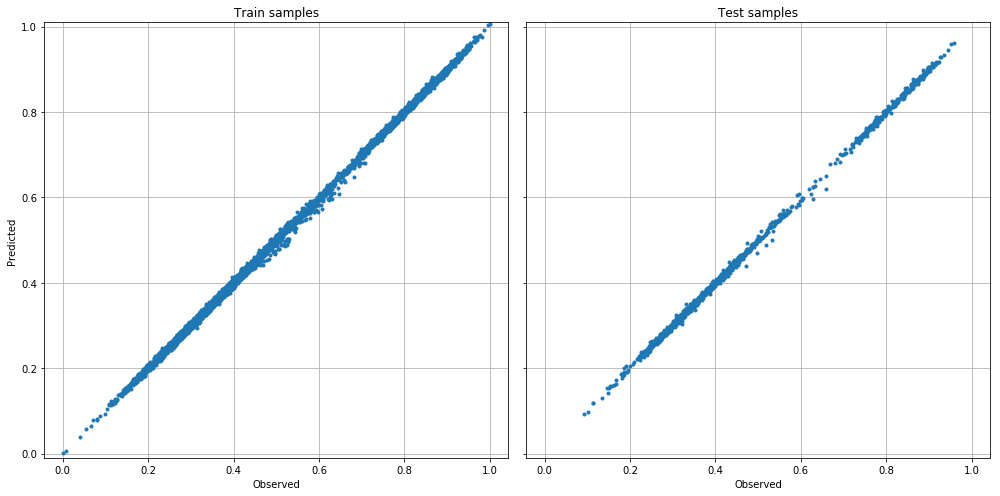

In [178]:
%run ML_pipelines.py
estimator = "GB_R"
clf = run_ML(ML_inputs,estimator)

### Classification

In [20]:
%run ML_pipelines.py
estimator = "DT_C"
clf = run_ML(ML_inputs,estimator,parameters = {})

	Returning masked 'train' data

Running ML with DT_C...

	Performing parameter grid search...

		Time taken:4.65

		Best parameters: {}

		CV 'train' score (mean +/- 2*sd): 0.97 (+/- 0.01)

		CV 'test' score (mean +/- 2*sd): 0.49 (+/- 0.01)

Train score is 0.96
	Returning masked 'test' data

Test score is 0.49


In [25]:
%run ML_pipelines.py
estimator = "RF_C"
clf = run_ML(ML_inputs,estimator,parameters = "default")

	Returning masked 'train' data

Running ML with RF_C...

	Performing parameter grid search...

		Time taken:22.67

		Best parameters: {'max_features': 'auto', 'min_samples_split': 300, 'n_estimators': 10}

		CV 'train' score (mean +/- 2*sd): 0.65 (+/- 0.02)

		CV 'test' score (mean +/- 2*sd): 0.53 (+/- 0.01)

Train score is 0.65
	Returning masked 'test' data

Test score is 0.53
